In [1]:
# https://coax.readthedocs.io/en/latest/examples/linear_regression/jax.html

In [16]:
import matplotlib.pyplot as plt

In [2]:
import jax
import jax.numpy as jnp
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [3]:
X, y = make_regression(n_features=3)

# X, y = jnp.array(X), jnp.array(y)

X, X_test, y, y_test = train_test_split(X, y)

In [4]:

# model weights
params = {
    'w': jnp.zeros(X.shape[1:]),
    'b': 0.
}


In [5]:
def forward(params, X):
    return jnp.dot(X, params['w']) + params['b']

In [6]:

def loss_fn(params, X, y):
    err = forward(params, X) - y
    return jnp.mean(jnp.square(err))  # mse

In [7]:

grad_fn = jax.grad(loss_fn)


In [8]:

def update(params, grads):
    return jax.tree_util.tree_map(lambda p, g: p - 0.05 * g, params, grads)

In [9]:
# the main training loop
for _ in range(50):
    loss = loss_fn(params, X_test, y_test)
    print(loss)

    grads = grad_fn(params, X, y)
    params = update(params, grads)

17261.7
14069.839
11499.526
9424.054
7743.5244
6379.014
5268.036
4361.0044
3618.4788
3009.0095
2507.4578
2093.6758
1751.4734
1467.8048
1232.1299
1035.9093
872.20575
735.36694
620.7768
524.6539
443.8928
375.9371
318.67667
270.3659
229.55685
195.04636
165.83217
141.07808
120.084946
102.26702
87.133026
74.26974
63.329876
54.02037
46.094276
39.342712
33.58916
28.68403
24.500818
20.93196
17.88636
15.286586
13.066769
11.170972
9.551502
8.167834
6.9854016
5.974784
5.1108885
4.3723216


In [10]:
params

{'b': Array(-1.075655, dtype=float32, weak_type=True),
 'w': Array([82.818535, 90.69533 , 43.182587], dtype=float32)}

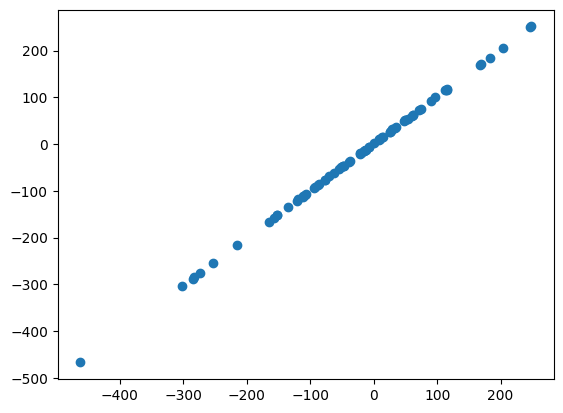

In [17]:
plt.scatter(forward(params, X), y)